# The Spark Foundation - GRIP task 1
## Data Science and Business Analyst Intern

## Prediction using supervised Machine learning. 

Problem statement : Predict the percentage of students based on the number of study hours.

In [1]:
# Import Libraries and Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from math import sqrt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
students = pd.read_excel(r"C:\Users\Swapnil\OneDrive\Desktop\Machine Learning\datasets\gripStudents.xlsx")

In [3]:
students.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Analysis 

In [4]:
students.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
students.isna().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
#sort_df = students.sort_values(['Hours'])
#sort_df

### In this data there is zero null values.

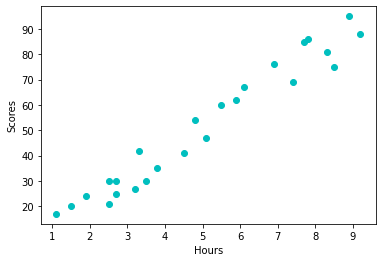

In [7]:
plt.scatter(students.Hours, students.Scores, color="c")
#plt.plot(height, weight, color="c")

plt.xlabel("Hours")
plt.ylabel("Scores")

plt.show()

<AxesSubplot:>

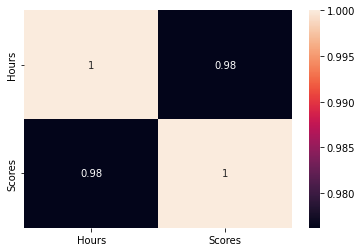

In [8]:
correlation = students.corr()
sns.heatmap(correlation, annot = True)

### Finding and treating outliers

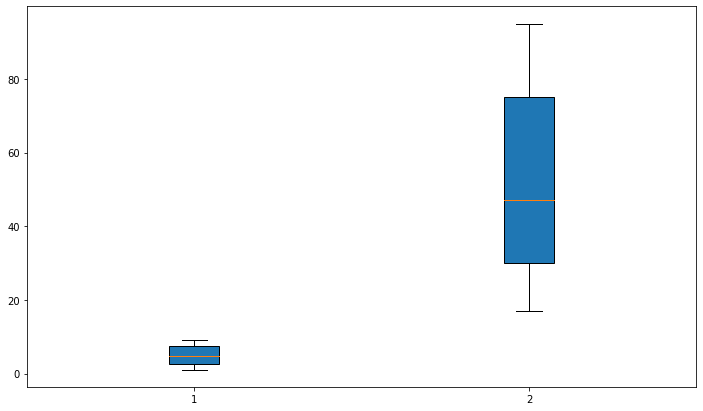

In [9]:
fig = plt.figure(1, figsize=(12,7))

ax = fig.add_subplot(111)
bp = ax.boxplot(students, patch_artist=True)

From above figure we can see that there is zero outliers.

### Splitting the data for Training and Testing

In [10]:
X = students[['Hours']]
y = students[['Scores']]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Fitting the data in Linear regression model 

Factors for selecting Linear regression

1. Data I having colinarity
2. correlation
3. continouse data
4. Simple dependent and independent variables

In [12]:
linear = LinearRegression()

In [13]:
model = linear.fit(x_train, y_train)
model

LinearRegression()

In [14]:
y_pred = model.predict(x_test)

C:\Users\Swapnil\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


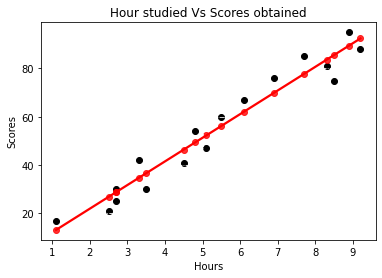

In [15]:
plt.scatter(x_train, y_train, color='black')

sns.regplot(x_train, linear.predict(x_train), color='r')

plt.title("Hour studied Vs Scores obtained")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True,color='white', linestyle='-.')

In [16]:
y_pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [17]:
x_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9
22,3.8
17,1.9
24,7.8


In [19]:
h = int(input())
predictions = model.predict([[h]])
print("If a student studying",h,"Hrs daily, then score will be",predictions[0])

9
If a student studying 9 Hrs daily, then score will be [90.46791556]


C:\Users\Swapnil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
pred2 = model.predict([[9.25]])
print("If students studies 9.25 hrs/day then predicted score of that students will be", pred2)

If students studies 9.25 hrs/day then predicted score of that students will be [[92.91505723]]


C:\Users\Swapnil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
MSE = format(mean_squared_error(y_test, y_pred), '.3f')
r2 = format(r2_score(y_test, y_pred),'.4f')

In [22]:
print('Root Mean Squared Error =',RMSE, '\nMean Squared Error =',MSE,'\nR2 Score =', r2)

Root Mean Squared Error = 4.792 
Mean Squared Error = 22.965 
R2 Score = 0.9568


In [23]:
mean_absolute_error(y_test, y_pred)

4.419727808027652

### This model gives 95.68 % of accuracy

In [24]:
linear.score(x_test, y_test)

0.9568211104435257

In [25]:
linear.score(x_train, y_train)

0.9484997422695115